# Exercise sheet D

**Exercise 1**

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

Load source and target point clouds ...

In [2]:
src_pts = np.load('src_pts.npy')
tgt_pts = np.load('tgt_pts.npy')

`src_pts` contains $N$ source points, `tgt_pts` contains $N$ target points with the normal vector, hence, `tgt_pts` is of shape (N,6). The first three coordinates for each row in `tgt_pts` are the $(x,y,z)$ components of the target point and the last three coordinates are components of the corresponding normal vector $(n_x,n_y,n_z)$.

Visualize ...

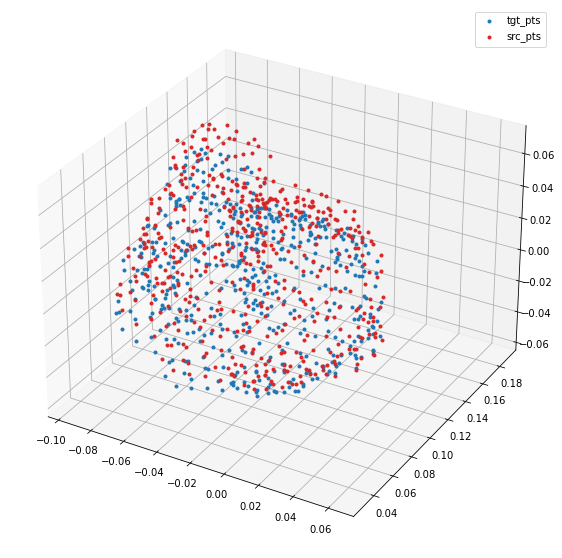

In [3]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(tgt_pts[:,0], tgt_pts[:,1], tgt_pts[:,2], '.', color='tab:blue', label='tgt_pts')
ax.plot(src_pts[:,0], src_pts[:,1], src_pts[:,2], '.', color='tab:red' , label='src_pts')
plt.legend();

Implement ICP with *point-to-plane* error metric:

In [ ]:
def icp_register_point_to_plane(src_pts, tgt_pts):
    """
    The function takes two arguments 
    
     - src_pts (numpy array of shape (N,3))
     - tgt_pts (numpy array of shape (N,6))
    """
    
    assert src_pts.shape[0] == tgt_pts.shape[0]
    assert tgt_pts.shape[1] == 6
    
    """
    Your code to construct A and b and to compute the 
    least-squares solution goes here.
    
    A = ...
    b = ...
    sol = ... (this will be a 6x1 vector)
    """

    
    
    """
    HELPER code below:
    
    This code assumes you have sol = (alpha,beta,gamma,tx,ty,tz)
    """ 
    
    # construct overall transformation matrix Rmat
    Rmat = np.zeros((4,4))
    Rmat[0:3,0:3] = R.from_euler('xyz', sol[0:3]).as_matrix()
    Rmat[:-1,-1] = sol[3:]
    Rmat[-1,-1] = 1.0
    
    # transform source points
    src_pts_tf = []
    for i in range(0,tgt_pts.shape[0]-1):
        ss = np.array([(src_pts[i][0]),(src_pts[i][1]),(src_pts[i][2]),(1)])
        p = np.dot(Rmat,ss)
        src_pts_tf.append(p)
    src_pts_tf = np.array(src_pts_tf)
    
    return sol, src_pts_tf

Run ICP algorithm ...

In [ ]:
sol, src_pts_tf = icp_register_point_to_plane(src_pts,tgt_pts)

... and plot the results:

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(tgt_pts[:,0], tgt_pts[:,1], tgt_pts[:,2], '.', color='tab:blue', label='tgt_pts')
ax.plot(src_pts_tf[:,0], src_pts_tf[:,1], src_pts_tf[:,2], '.', color='tab:red', label='transformed src_pts')
plt.legend();